<a href="https://colab.research.google.com/github/moongzee/daeboon/blob/master/Facebook_Prophet_%EC%9D%84_%ED%99%9C%EC%9A%A9%ED%95%9C_%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90_%EC%A3%BC%EA%B0%80%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Facebook Prophet을 활용한 주가 예측 모델

이번 튜토리얼 에서는 다음과 같은 **프로세스 파이프라인**으로 주가 예측을 진행합니다.

- FinanceDataReader를 활용하여 주가 데이터 받아오기
- Facebook Prophet을 활용하여 주가 예측

## 필요한 모듈 import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

## 데이터 (FinanceDataReader)

**FinanceDataReader**는 주가 데이터를 편리하게 가져올 수 있는 파이썬 패키지입니다.

- [GitHub Repo](https://github.com/FinanceData/FinanceDataReader)

**FinanceDataReader**가 아직 설치 되지 않으신 분들은 아래의 주석을 해제한 후 명령어로 설치해 주시기 바랍니다.

In [ ]:
!pip install finance-datareader

In [ ]:
import FinanceDataReader as fdr

In [ ]:
# 삼성전자 종목코드: 005930
samsung = fdr.DataReader('005930')

In [ ]:
naver = fdr.DataReader('035420')
kakao = fdr.DataReader('035720')

In [ ]:
naver.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-06-18,391500,400500,391000,398000,1268656,0.021823
2021-06-21,398000,402000,392000,397000,809114,-0.002513
2021-06-22,400000,400500,391000,391000,702840,-0.015113
2021-06-23,393000,427000,392500,423500,2721355,0.083120
2021-06-24,430000,436000,420000,420000,1124912,-0.008264


In [ ]:
kakao.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-06-18,150000,157500,149500,155000,7706345,0.047297
2021-06-21,155500,159500,152000,155000,8324948,0.000000
2021-06-22,158000,159000,155500,159000,4662042,0.025806
2021-06-23,162500,170000,161000,169500,9078797,0.066038
2021-06-24,172000,173000,165000,165500,6560484,-0.023599


매우 편리하게 삼성전자 주가 데이터를 `DataFrame`형식으로 받아옵니다.

기본 **오름차순 정렬**이 된 데이터임을 알 수 있습니다.

### 컬럼 설명

- `Open`:   시가
- `High`:   고가
- `Low`:    저가
- `Close`:  종가
- `Volume`: 거래량
- `Change`: 대비

In [ ]:
samsung.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-06-18,81100,81100,80500,80500,14916721,-0.004944
2021-06-21,79700,80000,79600,79900,16063340,-0.007453
2021-06-22,80200,80300,79900,80000,11773365,0.001252
2021-06-23,80500,80600,79900,80100,13856548,0.001250
2021-06-24,80400,80800,80100,80700,6462181,0.007491


**미국 주식 데이터**도 가져올 수 있습니다.

In [ ]:
# Apple(AAPL), 애플
apple = fdr.DataReader('AAPL')

In [ ]:
apple.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2021-06-17,131.79,129.94,132.54,129.66,96720000.0,0.0126
2021-06-18,130.46,130.71,131.51,130.24,108950000.0,-0.0101
2021-06-21,132.30,130.30,132.41,129.21,79660000.0,0.0141
2021-06-22,133.98,132.09,134.08,131.64,74780000.0,0.0127
2021-06-23,133.70,133.87,134.31,133.24,60210000.0,-0.0021


### 비트코인 시세

In [ ]:
btc = fdr.DataReader('BTC/KRW', '2016-01-01')
btc.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2021-06-20,41856000,42039000,42039000,41856000,880.0,-0.0044
2021-06-21,37264000,41856000,41856000,37264000,2060.0,-0.1097
2021-06-22,37826000,37260000,37826000,36670000,3470.0,0.0151
2021-06-23,39079000,37826000,39916000,37826000,1500.0,0.0331
2021-06-24,38311000,39079000,39079000,38311000,2000.0,-0.0197


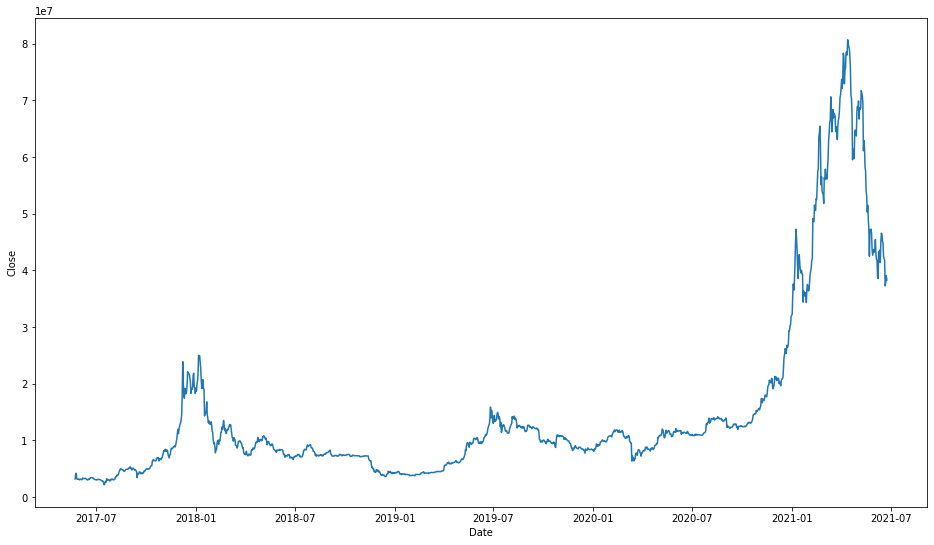

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(x=btc.index, y='Close', data=btc)
plt.show()

그 밖에 **금, 은과 같은 현물**, **달러와 같은 화폐** 데이터도 가져올 수 있습니다.

더욱 자세한 내용은 [GitHub 페이지 링크](https://github.com/FinanceData/FinanceDataReader)를 참고해 보시기 바랍니다.

In [ ]:
## 주가데이터 가져오기

In [ ]:
# 삼성전자 주식코드: 005930
STOCK_CODE = '005930'

In [ ]:
stock = fdr.DataReader(STOCK_CODE)

In [ ]:
stock.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-06-18,81100,81100,80500,80500,14916721,-0.004944
2021-06-21,79700,80000,79600,79900,16063340,-0.007453
2021-06-22,80200,80300,79900,80000,11773365,0.001252
2021-06-23,80500,80600,79900,80100,13856548,0.001250
2021-06-24,80400,80800,80100,80700,6917378,0.007491


In [ ]:
stock.index

DatetimeIndex(['1997-06-20', '1997-06-21', '1997-06-23', '1997-06-24',
               '1997-06-25', '1997-06-26', '1997-06-27', '1997-06-28',
               '1997-06-30', '1997-07-01',
               ...
               '2021-06-11', '2021-06-14', '2021-06-15', '2021-06-16',
               '2021-06-17', '2021-06-18', '2021-06-21', '2021-06-22',
               '2021-06-23', '2021-06-24'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

In [ ]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1997-06-20,1286,1286,1242,1251,150060,NaN
1997-06-21,1251,1256,1217,1222,86490,-0.023181
1997-06-23,1220,1233,1209,1224,140090,0.001637
1997-06-24,1233,1247,1215,1240,136590,0.013072
1997-06-25,1242,1249,1224,1242,572440,0.001613


## 시각화

Text(0, 0.5, 'price')

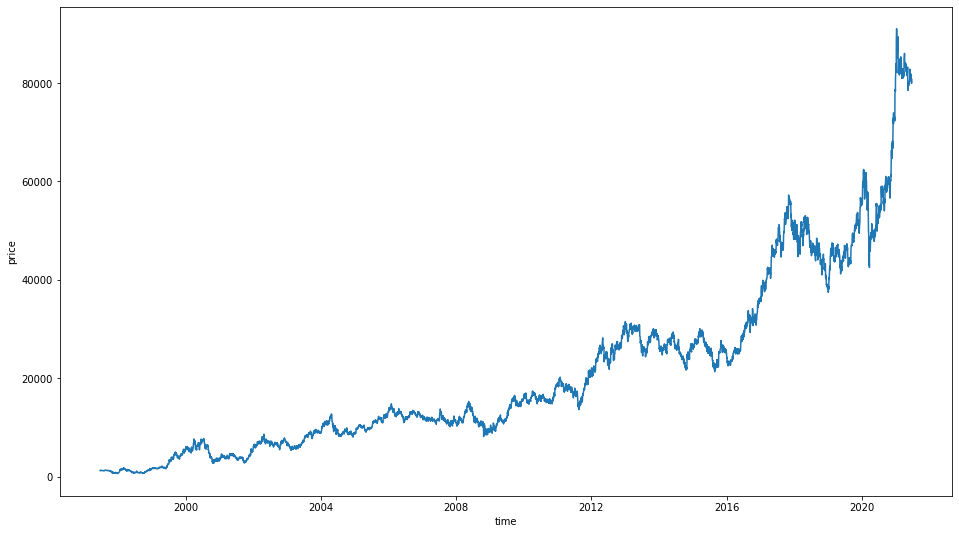

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

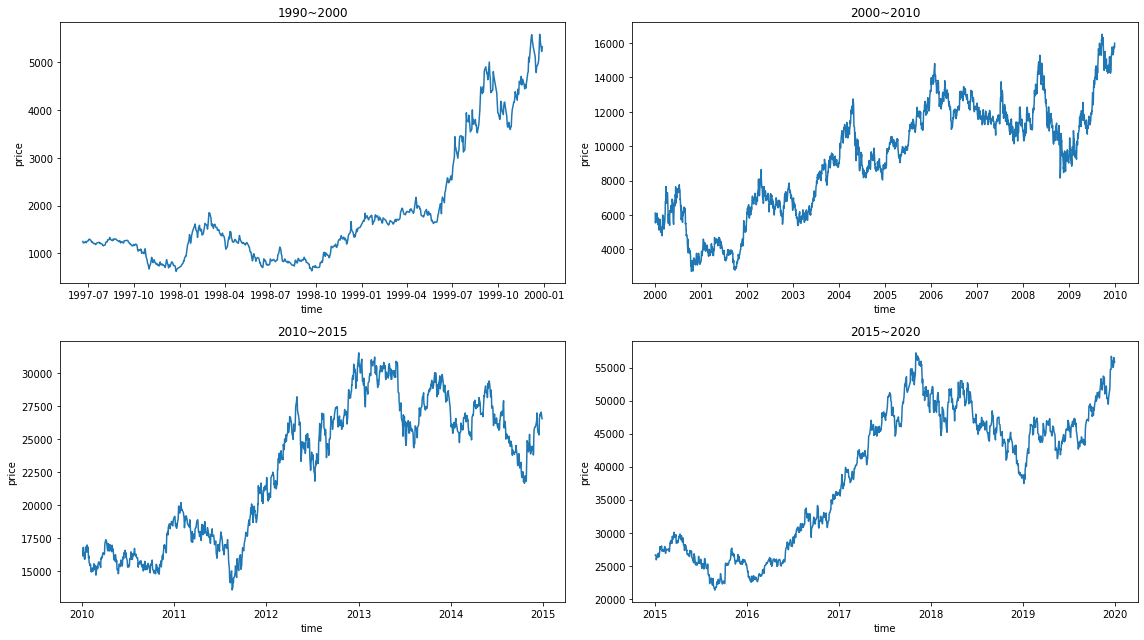

In [ ]:
time_steps = [['1990', '2000'], 
              ['2000', '2010'], 
              ['2010', '2015'], 
              ['2015', '2020']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = stock.loc[(stock.index > time_steps[i][0]) & (stock.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

In [ ]:
stock = fdr.DataReader(STOCK_CODE, '2021')

## Prophet

### 모듈 import

In [ ]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly

### 컬럼

- 반드시 **y** 컬럼과 **ds** 컬럼이 존재해야합니다.
- 예측 값은 **y**, 시계열 데이터는 **ds**에 지정합니다.

In [ ]:
stock['y'] = stock['Close']
stock['ds'] = stock.index

In [ ]:
stock.head()

,Open,High,Low,Close,Volume,Change,y,ds
Date,,,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691,83000,2021-01-04
2021-01-05,81600,83900,81600,83900,35335669,0.010843,83900,2021-01-05
2021-01-06,83300,84500,82100,82200,42089013,-0.020262,82200,2021-01-06
2021-01-07,82800,84200,82700,82900,32644642,0.008516,82900,2021-01-07
2021-01-08,83300,90000,83000,88800,59013307,0.071170,88800,2021-01-08


### prophet 객체 선언 및 학습

In [ ]:
m = Prophet()
m.fit(stock)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**period**에 예측 하고 싶은 기간을 입력 합니다.

예측할 시계열 row가 추가 됩니다.

In [ ]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
144,2021-07-20
145,2021-07-21
146,2021-07-22
147,2021-07-23
148,2021-07-24


- `predict`로 예측을 진행합니다.
- `predict` 안에는 이전 단계에서 만들어준 future 데이터프레임을 입력합니다.


In [ ]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
144,2021-07-20,79266.252393,78022.612294,82378.497642,78777.913610,79745.542744,898.130693,898.130693,898.130693,898.130693,898.130693,898.130693,0.0,0.0,0.0,80164.383086
145,2021-07-21,79248.084108,77674.927447,81831.223561,78727.134299,79753.882881,481.240786,481.240786,481.240786,481.240786,481.240786,481.240786,0.0,0.0,0.0,79729.324894
146,2021-07-22,79229.915824,77537.143438,81920.183558,78688.850826,79772.126108,589.352314,589.352314,589.352314,589.352314,589.352314,589.352314,0.0,0.0,0.0,79819.268138
147,2021-07-23,79211.747539,77781.920935,82069.109690,78642.764408,79784.178420,679.396319,679.396319,679.396319,679.396319,679.396319,679.396319,0.0,0.0,0.0,79891.143858
148,2021-07-24,79193.579255,75347.838131,79707.450612,78596.002276,79798.947578,-1670.808303,-1670.808303,-1670.808303,-1670.808303,-1670.808303,-1670.808303,0.0,0.0,0.0,77522.770952


# 코드 3줄로 예측 <br>
Prophet 객체 생성<br>
fit으로 훈련하고 predict 예측함<br>
시각화

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


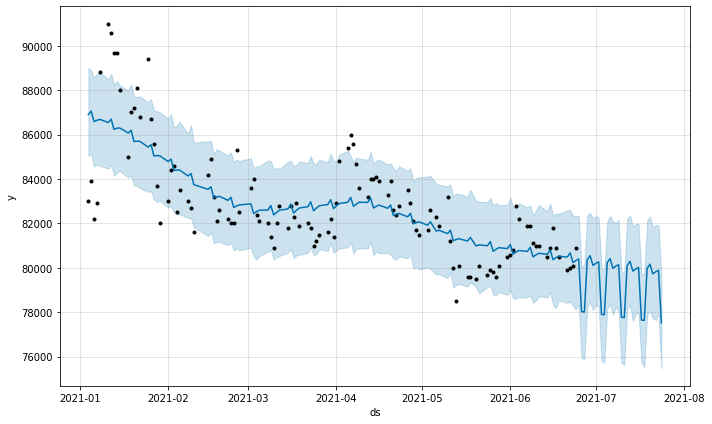

In [ ]:
m=Prophet()
forecast = m.fit(stock).predict(future)
fig = m.plot(forecast)

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-40:-20]

,ds,yhat,yhat_lower,yhat_upper
109,2021-06-11,80654.211810,78721.139129,82824.642702
110,2021-06-14,80613.807131,78663.936001,82556.663623
111,2021-06-15,80800.273046,78926.886802,82908.346719
112,2021-06-16,80365.214854,78311.458179,82339.324248
113,2021-06-17,80455.158098,78185.941557,82450.019201
114,2021-06-18,80527.033818,78534.717784,82437.756922
115,2021-06-21,80486.629139,78423.879712,82591.270528
116,2021-06-22,80673.095054,78483.343543,82609.709729
117,2021-06-23,80238.036862,78294.614752,82345.695530
118,2021-06-24,80327.980106,78126.090589,82335.576852


### 시각화

`plot`은 트렌드와 함께 예측된 결과물을 시각화하여 보여줍니다.

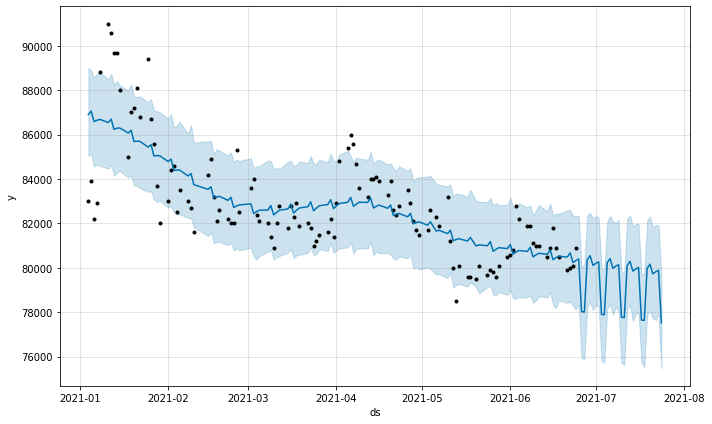

In [ ]:
fig = m.plot(forecast)

### plotly 활용

In [ ]:
fig = plot_plotly(m, forecast)
fig

### 컴포넌트 별 시각화

컴포넌트 별 시각화에서는 seasonality 별 시각화를 진행해 볼 수 있습니다.

**trend, yearly, weekly 데이터를 시각화**하여 보여 줍니다.

In [ ]:
plot_components_plotly(m, forecast)

### change points

By default, Prophet specifies 25 potential changepoints which are uniformly placed in the first 80% of the time series. The vertical lines in this figure indicate where the potential changepoints were placed:

처음 80%의 시계열 데이터에 대하여 잠재적인 25개의 changepoints를 만들고, 그 중 선별하여 최종 changepoints를 그래프에서 vertical line으로 그려주게 됩니다.

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

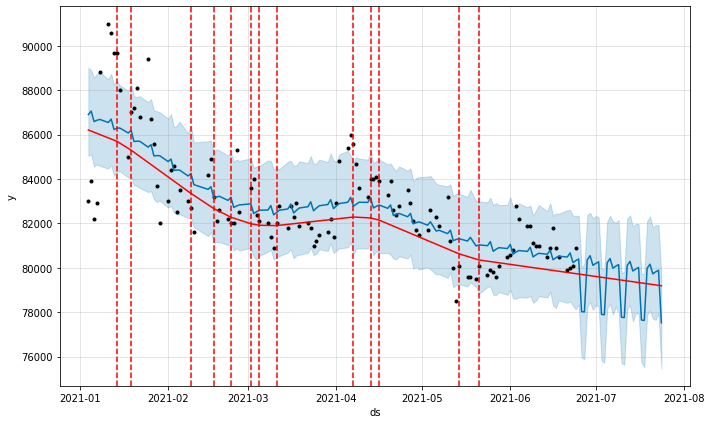

In [ ]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

### flexibility 조절

If the trend changes are being overfit (too much flexibility) or underfit (not enough flexibility), you can adjust the strength of the sparse prior using the input argument changepoint_prior_scale. By default, this parameter is set to 0.05. Increasing it will make the trend more flexible:

flexibility **계수가 낮으면 과소적합, 높으면 과대적합**하여 예측하게 됩니다.

중요한 hyperparameter 입니다.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


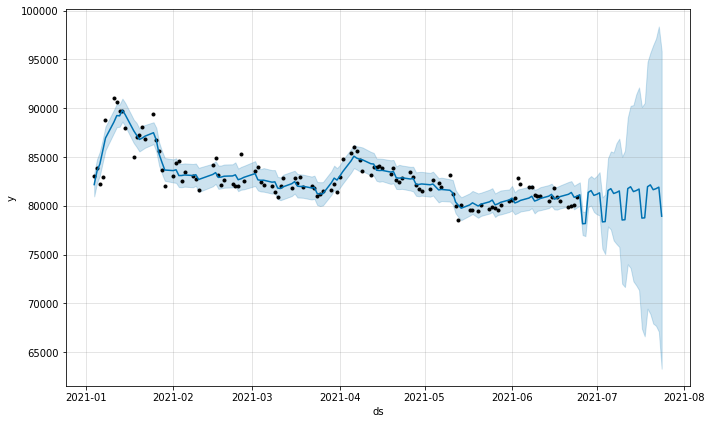

In [ ]:
m = Prophet(changepoint_prior_scale=0.8)
forecast = m.fit(stock).predict(future)
fig = m.plot(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


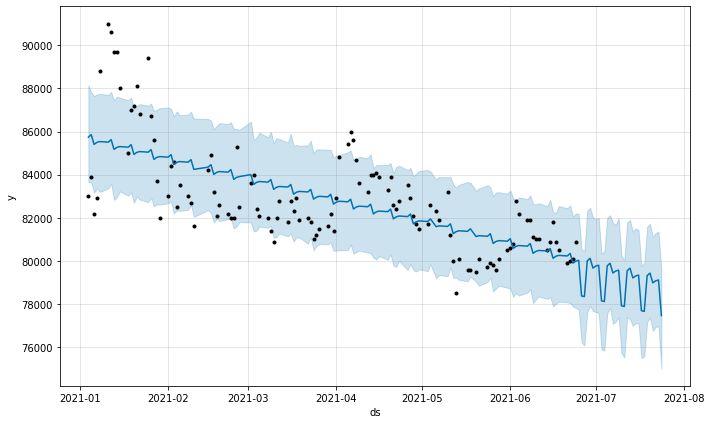

In [ ]:
m = Prophet(changepoint_prior_scale=0.01)
forecast = m.fit(stock).predict(future)
fig = m.plot(forecast)